**Purpose:** To explore the basic workflow (square bin) of stereopy using a single-sample dataset\
**Author:** Tamim Ahsan\
**Date:** January 6, 2026

# 1. Import packages and read data

In [1]:
# Import packages
import stereo as st
st.__version__

'1.6.2'

In [2]:
# Read the info of data
# which has been download from STomicsDB (https://db.cngb.org/stomics/datasets/STDS0000318)
# and contains human PFC data 
# from a single sample (STSP0010540)
file_path = "GSM8330060_B02009F6.tissue.gef"
st.io.read_gef_info(file_path) # read info about the data

[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1559][INFO]: This is GEF file which contains traditional bin infomation.
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1560][INFO]: bin_type: bins
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1563][INFO]: Bin size list: ['bin1']
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1569][INFO]: Resolution: 500
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1572][INFO]: Gene count: 43326
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1581][INFO]: offsetX: 1
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1584][INFO]: offsetY: 1
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1587][INFO]: Width: 26458
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1590][INFO]: Height: 26457
[2026-01-11 23:57:35][Stereo][8111][MainThread][22980

{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 43326,
 'offsetX': 1,
 'offsetY': 1,
 'width': 26458,
 'height': 26457,
 'maxExp': 39}

In [3]:
# Read the data itself
data = st.io.read_gef(file_path = file_path,
                     bin_size = 50) # bin size of 50 was used to start with 
data

[2026-01-11 23:57:35][Stereo][8111][MainThread][22980951721792][reader][1357][INFO]: read_gef begin ...


2026-01-11 23:57:35 [INFO   ] input file:GSM8330060_B02009F6.tissue.gef specify block size:50
2026-01-11 23:57:45 [INFO   ] generateBinInfo elspaed 41.156091 cpu sec


[2026-01-11 23:58:26][Stereo][8111][MainThread][22980951721792][reader][1530][INFO]: the matrix has 141494 cells, and 43326 genes.
[2026-01-11 23:58:26][Stereo][8111][MainThread][22980951721792][reader][1531][INFO]: read_gef end.


StereoExpData object with n_cells X n_genes = 141494 X 43326
bin_type: bins
bin_size: 50
offset_x = 1
offset_y = 1
cells: ['cell_name']
genes: ['gene_name']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

# 2. Preprocessing

## 2.1 Qulity control 
There are three indicators -
1. total_counts = total read counts per cell
2. n_genes_by_counts = the number of genes expressed 
3. pct_countss_mt = the percentage of counts in mitochondrial genes

In [4]:
# QC calculation 
data.tl.cal_qc()

[2026-01-11 23:58:26][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run cal_qc...
[2026-01-11 23:58:27][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: cal_qc end, consume time 1.3262s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

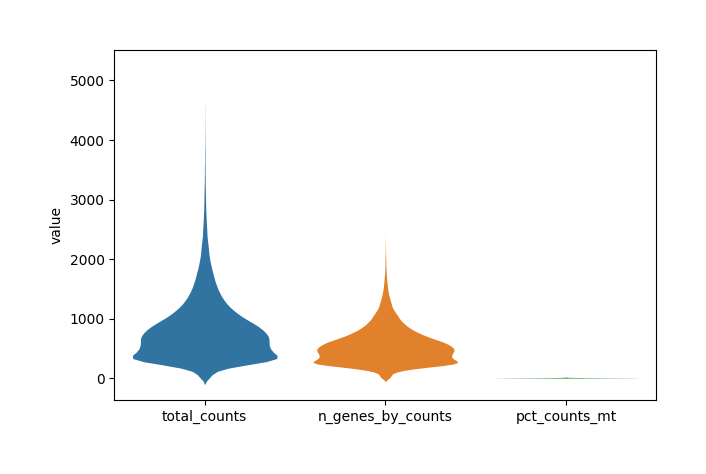

In [5]:
# Visualize the distribution of the three indicators
data.plt.violin()

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

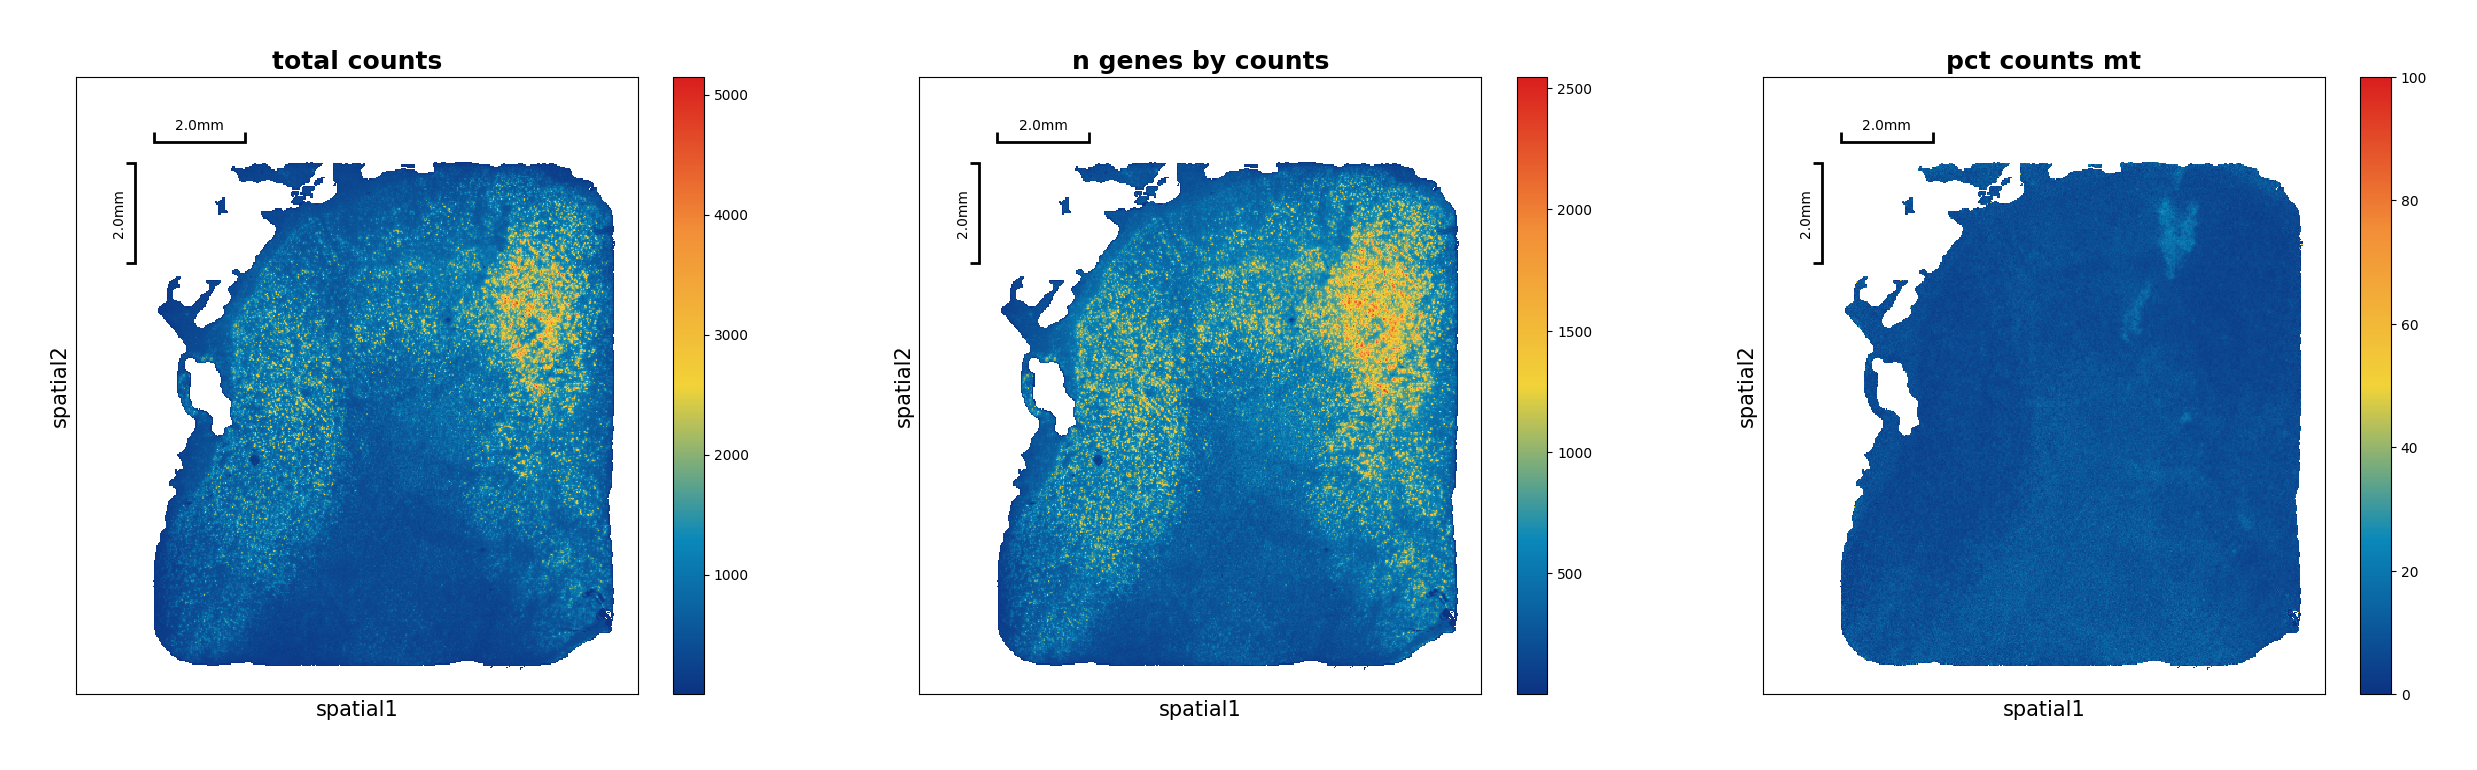

In [6]:
# Spatial scatter
data.plt.spatial_scatter(cells_key=["total_counts", "n_genes_by_counts", "pct_counts_mt"], ncols=3)

## 2.2 Filtering
Bins with
- too few genes
- too few reads
- too high mitochondrial contents\
are filtered out

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

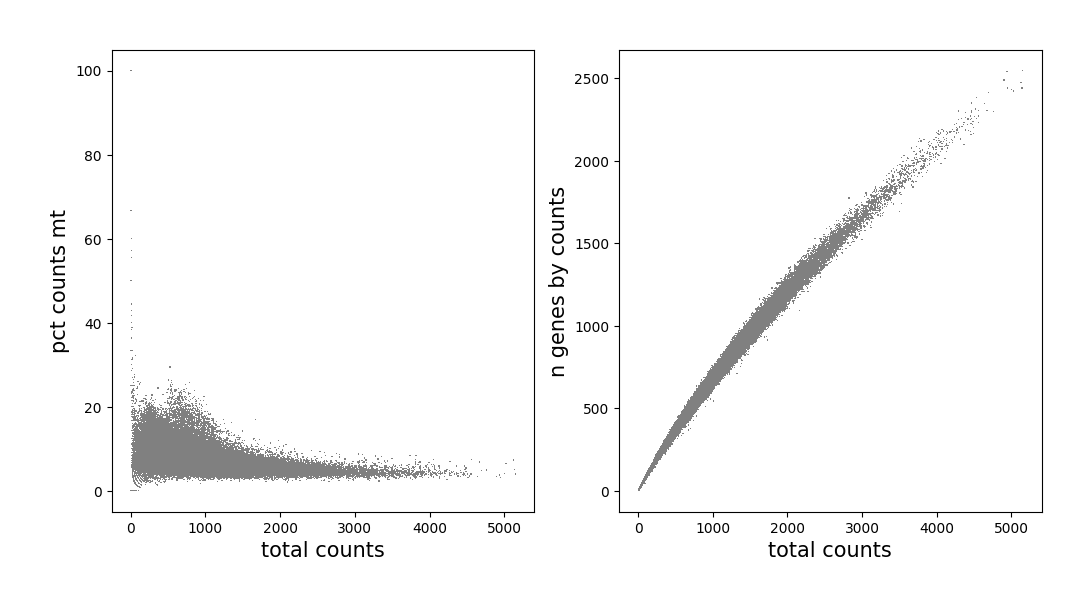

In [7]:
# Visualize the relationship of mitochondrial counts and gene counts with total read counts
data.plt.genes_count()

In [8]:
# Filter low-quality bins/cells
print(f"The number of bins/cells before filtering = {data.shape[0]}")
print(f"The number of genes before filtering = {data.shape[1]}")
data.tl.filter_cells(min_counts = 20,
                    min_genes = 3,
                    pct_counts_mt = 15, # this sample has high mt contents in general
                    inplace = True)
print("----------")
print(f"The number of bins/cells after filtering = {data.shape[0]}")
print(f"The number of genes after filtering = {data.shape[1]}") # to show that genes are not filtered at this stage 

[2026-01-11 23:58:42][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run filter_cells...


The number of bins/cells before filtering = 141494
The number of genes before filtering = 43326


[2026-01-11 23:58:43][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: filter_cells end, consume time 0.5617s.


----------
The number of bins/cells after filtering = 137820
The number of genes after filtering = 43326


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

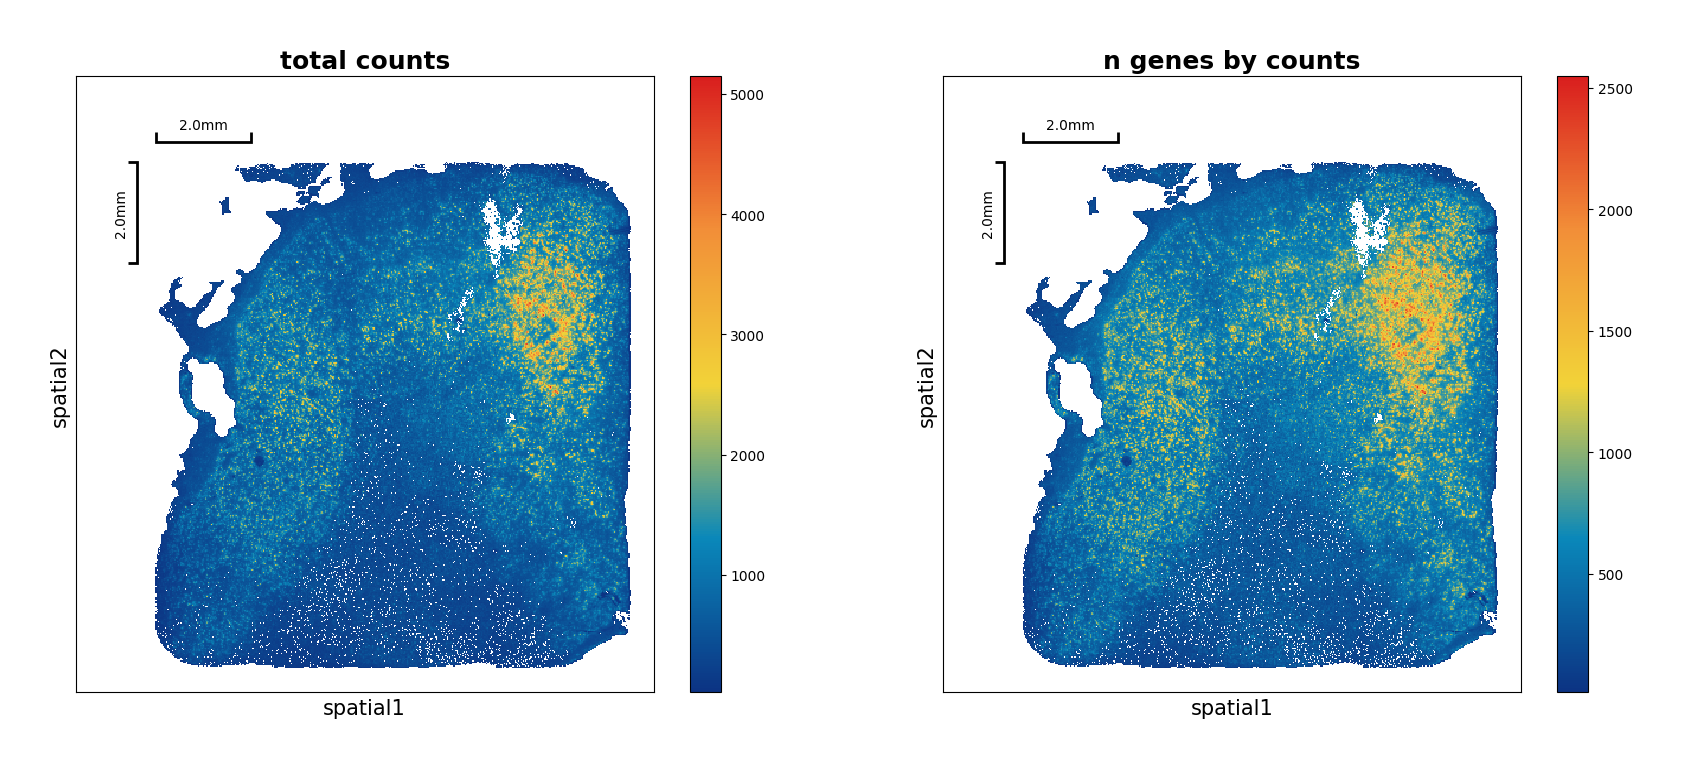

In [9]:
# See which bins/cells were filtered out
data.plt.spatial_scatter()

In [10]:
# Filter poorly captured genes 
print(f"The number of bins/cells before filtering = {data.shape[0]}")
print(f"The number of genes before filtering = {data.shape[1]}")
data.tl.filter_genes(min_cells = 100,
                    min_counts = 10,
                    inplace = True)
print("----------")
print(f"The number of bins/cells after filtering = {data.shape[0]}")  # to show that cells are not filtered at this stage
print(f"The number of genes after filtering = {data.shape[1]}") 

[2026-01-11 23:58:48][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run filter_genes...


The number of bins/cells before filtering = 137820
The number of genes before filtering = 43326


[2026-01-11 23:58:50][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: filter_genes end, consume time 1.3682s.


----------
The number of bins/cells after filtering = 137820
The number of genes after filtering = 20312


In [11]:
# Raw data checkpoint can be set here 
data.tl.raw_checkpoint()
data.tl.raw

StereoExpData object with n_cells X n_genes = 137820 X 20312
bin_type: bins
bin_size: 50
offset_x = 1
offset_y = 1
cells: ['cell_name', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
cells_matrix = ['spatial']
Layers with keys: 
tl.result: []

## 2.3 Normalization 

In [12]:
# log1p normalization is done for this one
data.tl.normalize_total(target_sum = 1000)
data.tl.log1p()

[2026-01-11 23:58:50][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run normalize_total...
[2026-01-11 23:58:50][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: normalize_total end, consume time 0.4772s.
[2026-01-11 23:58:50][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run log1p...
[2026-01-11 23:58:51][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: log1p end, consume time 0.1677s.


## 2.4 Highly variable gene selection 

In [13]:
# 2000 highly variable genes are selected
data.tl.highly_variable_genes(min_mean = 0.0125,
                              max_mean = 3,
                              min_disp = 0.5,
                              n_top_genes = 2000,
                              res_key = "highly_variable_genes")

[2026-01-11 23:58:51][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2026-01-11 23:58:52][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: highly_variable_genes end, consume time 0.8589s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

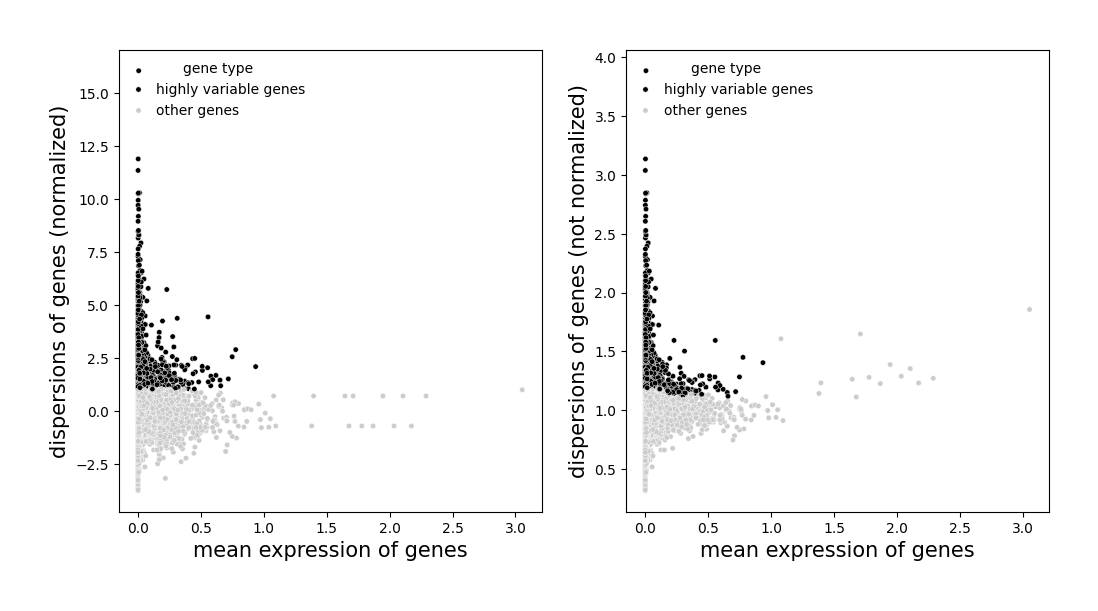

In [14]:
# Plot highly variable genes
data.plt.highly_variable_genes(res_key = "highly_variable_genes")

In [15]:
# Scale the data
# Clip values with standard deviation > 10
data.tl.scale(max_value = 10, zero_center = True)

[2026-01-11 23:58:53][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run scale...
[2026-01-11 23:59:14][Stereo][8111][MainThread][22980951721792][scale][53][INFO]: Truncate at max_value 10
[2026-01-11 23:59:16][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: scale end, consume time 22.9482s.


# 3. Embedding

## 3.1 PCA

In [16]:
# Perform PCA
data.tl.pca(use_highly_genes = True, # only highly variable genes were used
           n_pcs = 30,
           res_key = "pca")
data.tl.key_record

[2026-01-11 23:59:16][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run pca...
[2026-01-11 23:59:28][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: pca end, consume time 11.8117s.


{'hvg': ['highly_variable_genes'],
 'pca': ['pca'],
 'neighbors': [],
 'umap': [],
 'cluster': [],
 'marker_genes': []}

[2026-01-11 23:59:28][Stereo][8111][MainThread][22980951721792][plot_collection][84][INFO]: register plot_func elbow to <stereo.plots.plot_collection.PlotCollection object at 0x14e6244af7f0>


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

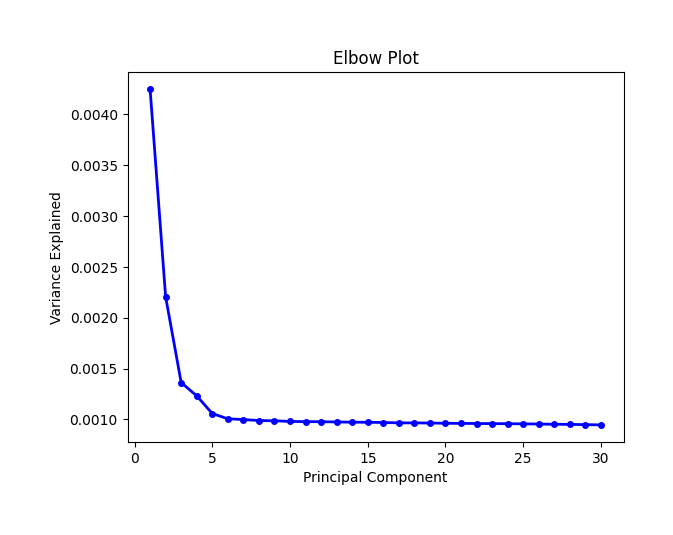

In [17]:
# Elbow plot to decide how many PCs to use
data.plt.elbow(pca_res_key = "pca")

## 3.2 Neighborhood graph

In [18]:
# Create a neighborhood graph over all cells/bins
data.tl.neighbors(pca_res_key = "pca",
                 n_pcs = 30, # all 30 PCs are used
                 res_key = "neighbors",
                 n_jobs = -1)

# Compute a neighbourhood graph using spatial coordinates 
data.tl.spatial_neighbors(neighbors_res_key = "neighbors",
                         res_key = "spatial_neighbors")

[2026-01-11 23:59:28][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run neighbors...
[2026-01-12 00:00:05][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: neighbors end, consume time 36.9443s.
[2026-01-12 00:00:05][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run spatial_neighbors...
[2026-01-12 00:00:15][Stereo][8111][MainThread][22980951721792][reader][973][INFO]: Adding sample in adata.obs['orig.ident'].
[2026-01-12 00:00:15][Stereo][8111][MainThread][22980951721792][reader][976][INFO]: Adding data.position as adata.obsm['spatial'] .
[2026-01-12 00:00:15][Stereo][8111][MainThread][22980951721792][reader][981][INFO]: Adding data.position as adata.obs['x'] and adata.obs['y'] .
[2026-01-12 00:00:15][Stereo][8111][MainThread][22980951721792][reader][1021][INFO]: Adding data.tl.result['highly_variable_genes'] into adata.var .
[2026-01-12 00:00:15][Stereo][8111][MainThread][22980951721792][reader][1065][INFO]: Ad

## 3.3 UMAP

In [19]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2026-01-12 00:00:18][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2026-01-12 00:01:33][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: umap end, consume time 74.3707s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

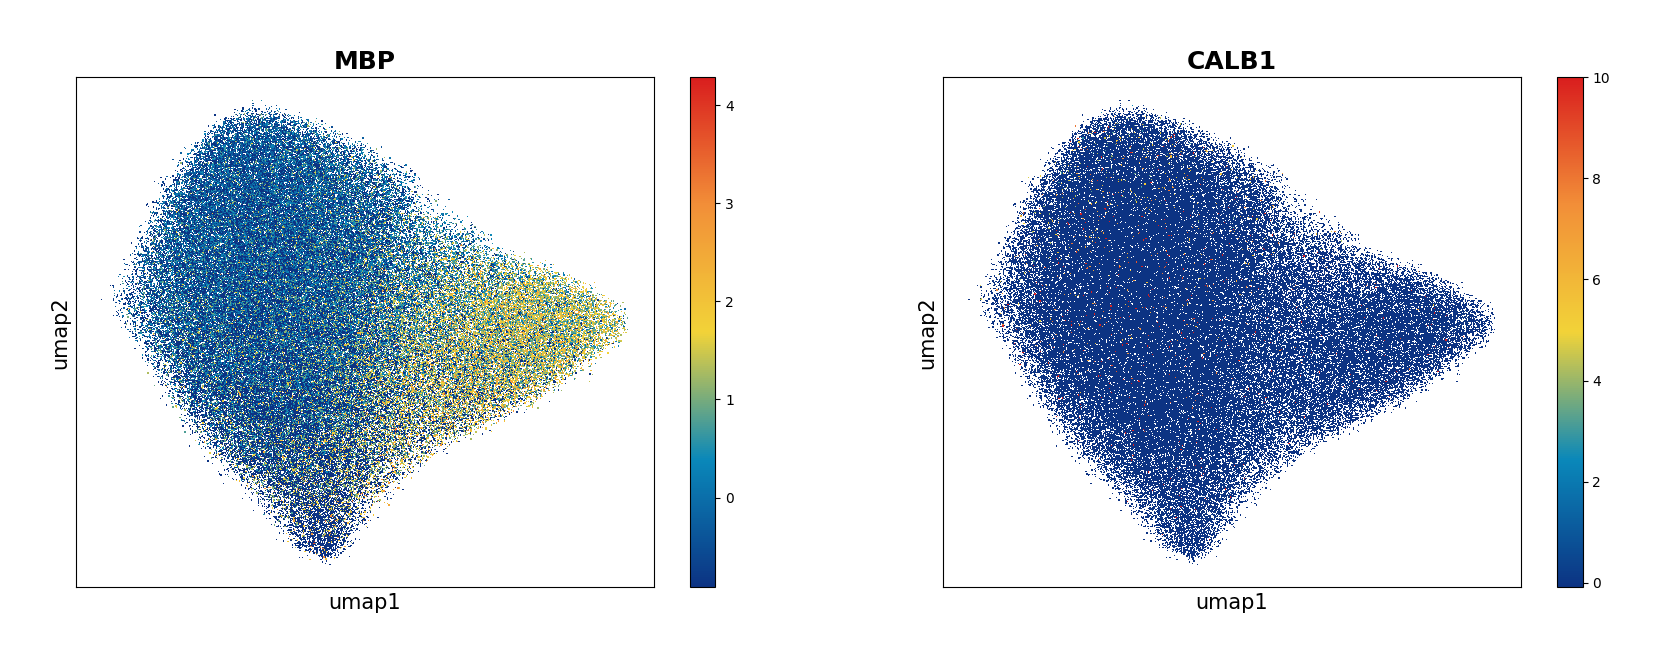

In [20]:
# Plot UMAP
data.plt.umap(gene_names=["MBP", "CALB1"], res_key='umap')

# 4. Clustering

In [21]:
# Leiden clustering 
data.tl.leiden(neighbors_res_key = "neighbors",
               res_key = "leiden",
               resolution = 0.6) # start with a small one

[2026-01-12 00:01:39][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run leiden...
[2026-01-12 00:04:05][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: leiden end, consume time 145.9636s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

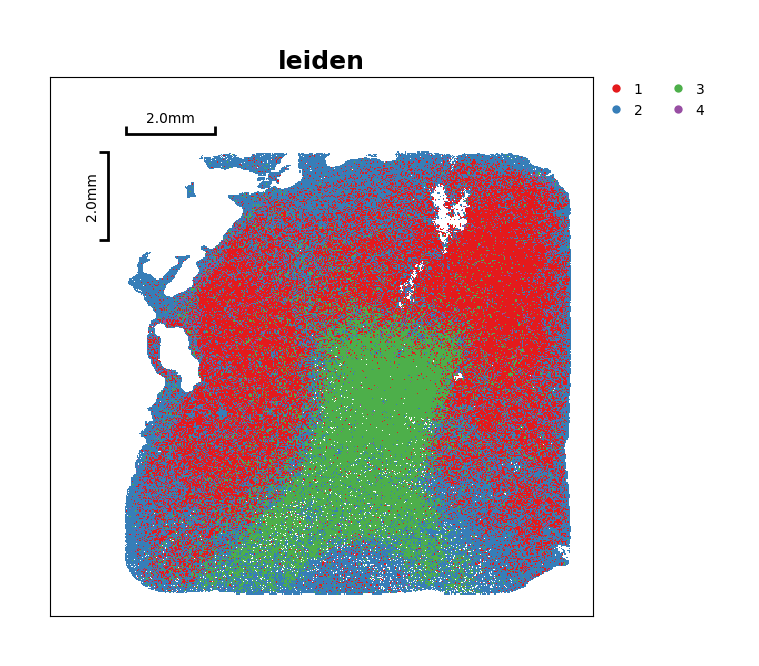

In [22]:
# Plot the spatial locaion of the leiden clusters
data.plt.cluster_scatter(res_key="leiden")

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

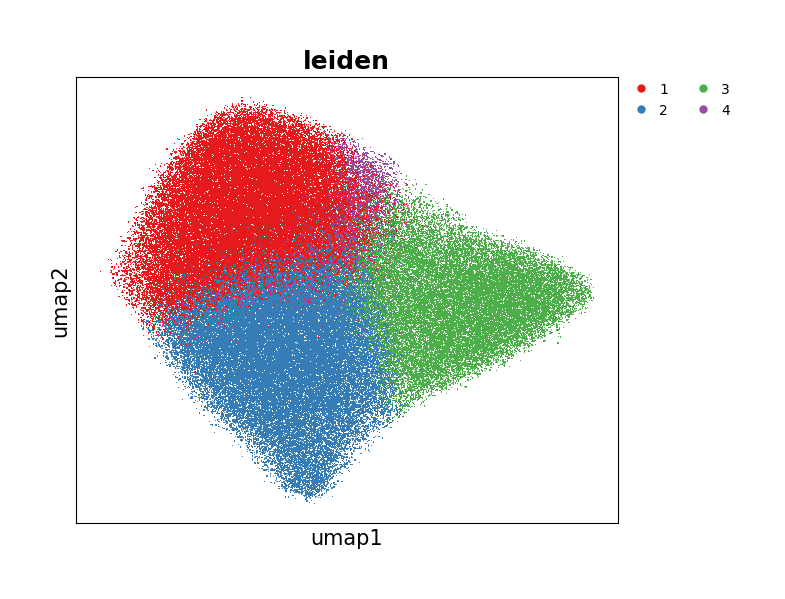

In [23]:
# UMAP embedding
data.plt.umap(res_key="umap", cluster_key="leiden")

In [24]:
# Leiden clustering using the spatial data
data.tl.leiden(neighbors_res_key = "spatial_neighbors", 
               res_key = "spatial_leiden",
               resolution = 0.6)

[2026-01-12 00:04:08][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run leiden...
[2026-01-12 00:16:02][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: leiden end, consume time 714.1432s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

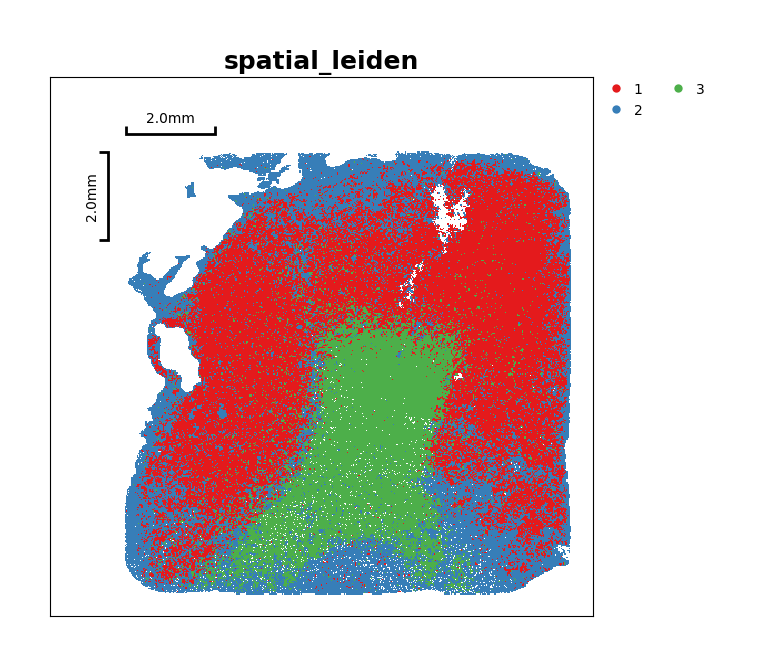

In [25]:
# Visualize spatial leiden 
data.plt.cluster_scatter(res_key = "spatial_leiden")

# 5. Find marker genes

In [26]:
# Find marker genes
data.tl.find_marker_genes(cluster_res_key="spatial_leiden", # the two clusters may be grey and white matters
                          method='t_test',
                          use_highly_genes=False,
                          use_raw=True)

[2026-01-12 00:16:03][Stereo][8111][MainThread][22980951721792][st_pipeline][41][INFO]: start to run find_marker_genes...
[2026-01-12 00:16:07][Stereo][8111][MainThread][22980951721792][tool_base][122][INFO]: read group information, grouping by group column.
[2026-01-12 00:16:07][Stereo][8111][MainThread][22980951721792][tool_base][151][INFO]: start to run...
[2026-01-12 00:16:08][Stereo][8111][MainThread][22980951721792][tool_base][153][INFO]: end to run.
[2026-01-12 00:16:08][Stereo][8111][MainThread][22980951721792][st_pipeline][44][INFO]: find_marker_genes end, consume time 4.6077s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

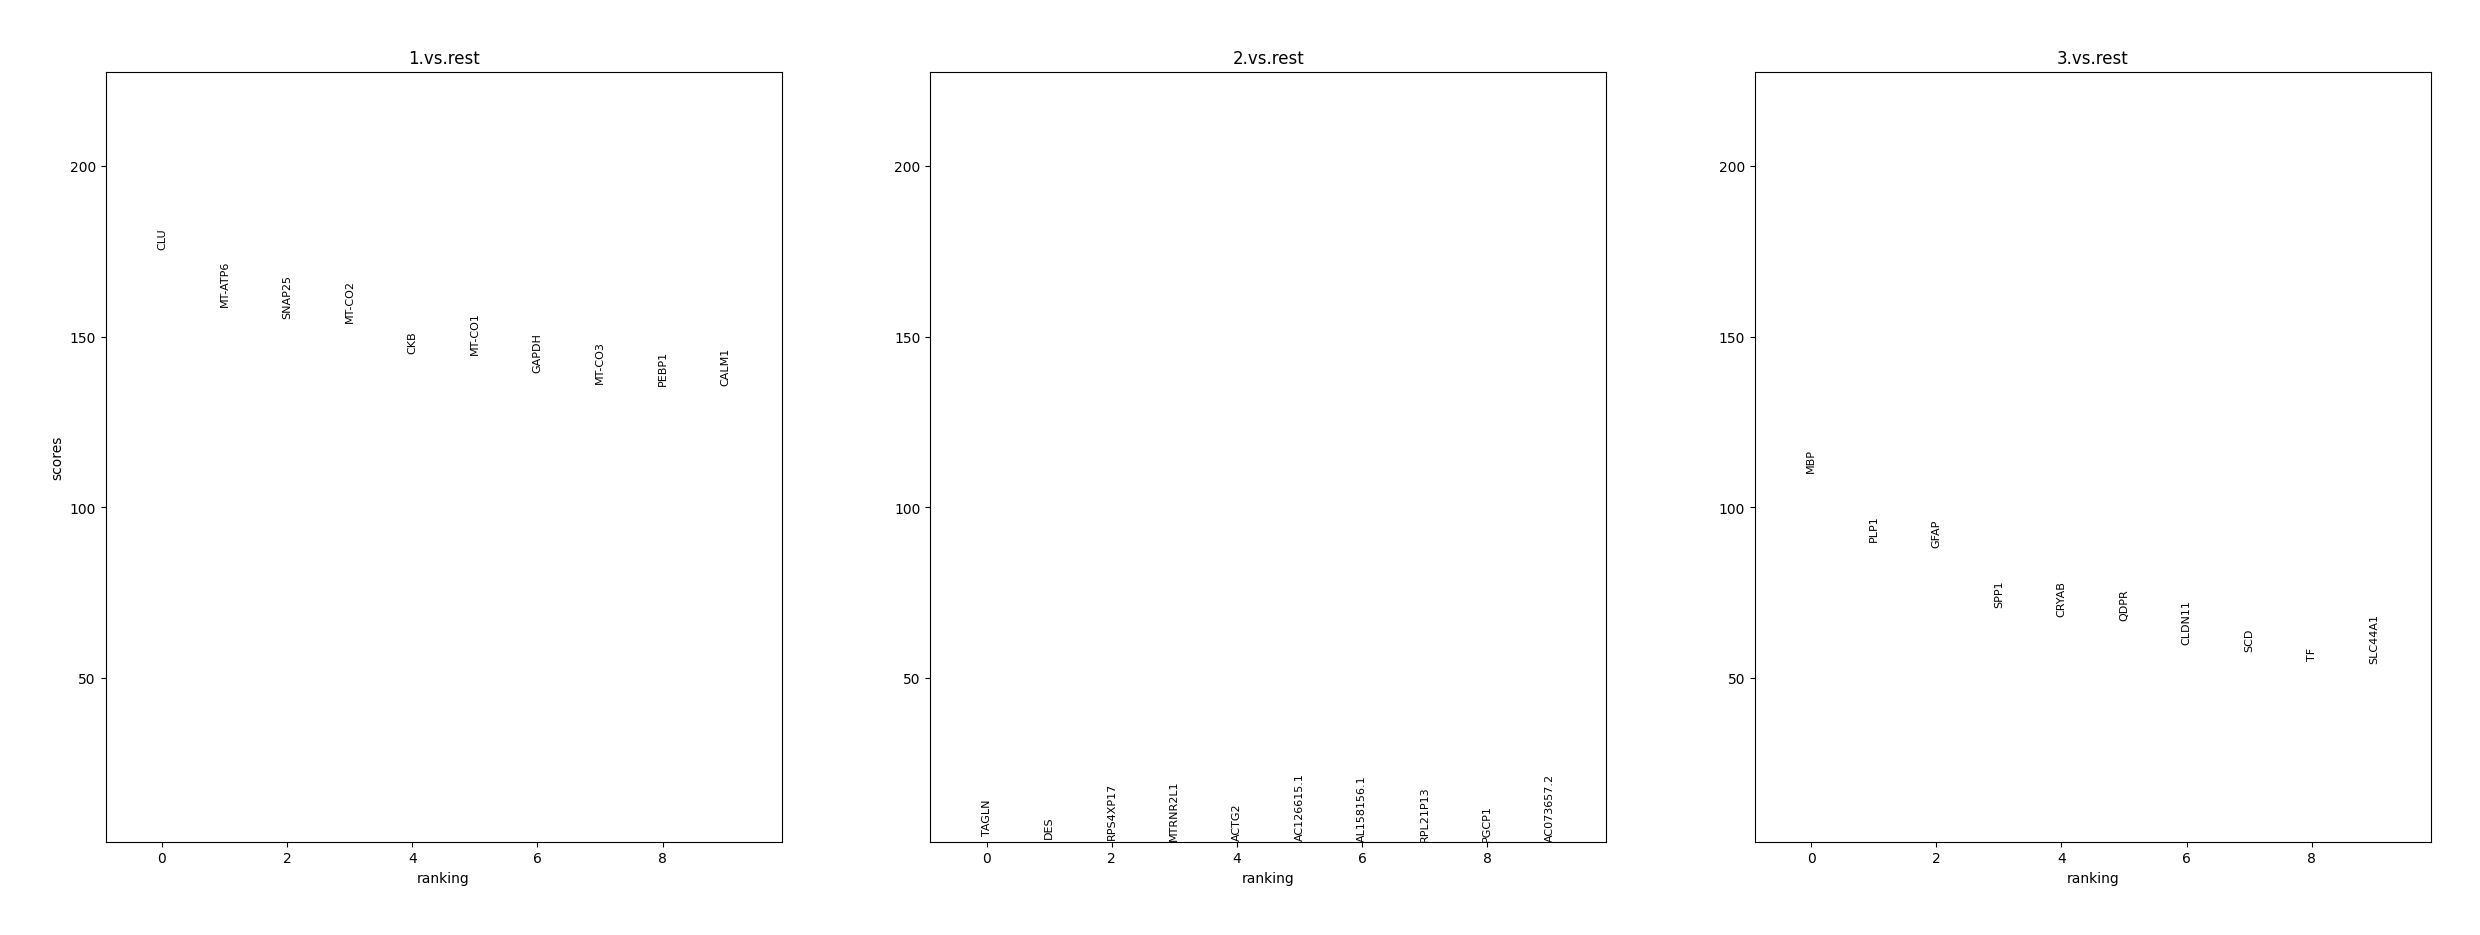

In [27]:
# Plot marker gene names
data.plt.marker_genes_text(res_key = "marker_genes",
                          markers_num = 10,
                          sort_key = "scores")

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

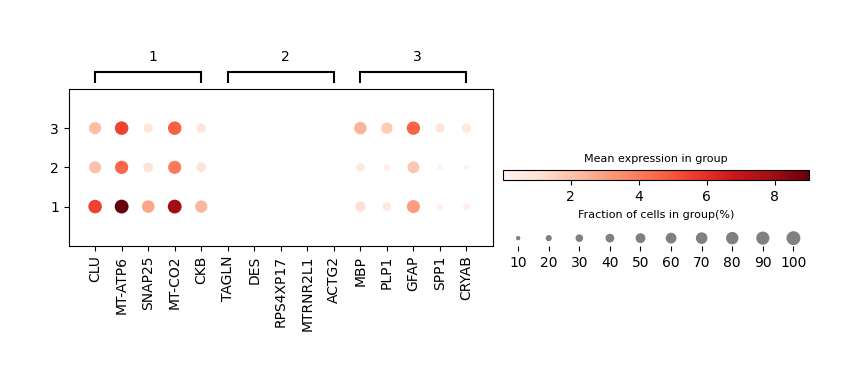

In [28]:
# Scatter plot of the marker genes
data.plt.marker_genes_scatter(res_key="marker_genes", markers_num=5)

**Final comments**
- The clusters may be annotated using the marker genes, but the QC and clustering steps will have to be optimized before that can be done
- This sample is not of very high quality 